In [2]:
import random

EMAIL = 'santiplana14@gmail.com'

dif1 = [f"P{i}" for i in range(1,8)] + [f"N{i}" for i in range(1,2)] + [f"C{i}" for i in range(1,2)] + [f"V{i}" for i in range(1,2)]

dif2 = [f"P{i}" for i in range(8,28)] + [f"N{i}" for i in range(2,7)] + [f"C{i}" for i in range(2,4)] + [f"V{i}" for i in range(2,9)]

dif3 = [f"P{i}" for i in range(28,34)] + [f"N{i}" for i in range(7,9)] + [f"C{i}" for i in range(4,9)] + [f"V{i}" for i in range(9,11)]

dificultad_ejs = {1: set(dif1), 2: set(dif2), 3: set(dif3)}

ejercicios = set()

random.seed(hash(EMAIL))

for dif in [1,2,2,2,2,3,3]:
    opciones_preliminares = dificultad_ejs[dif]
    if len(ejercicios)>=3:
        opciones_preliminares = set()
        used_types = set([e[0] for e in ejercicios])
        if "N" in used_types and "P" in used_types and "V" in used_types and "C" in used_types:
            opciones_preliminares = dificultad_ejs[dif]
        else:
            for t in ["N", "P", "C", "V"]:
                if t not in used_types:
                    opciones_preliminares.update([e for e in dificultad_ejs[dif] if e[0]==t])
    opciones = opciones_preliminares-ejercicios
    elegido = random.choice(list(opciones))
    ejercicios.add(elegido)

print(ejercicios)

{'P22', 'N4', 'P4', 'V4', 'V9', 'C8', 'P23'}


* P22 - ¿Cúal es la correlación entre el score que deja un usuario en una review, y el score que dejó en la anterior? Tenemos la teoría de que un usuario tiende a dejar reviews similares. Puede tomar un sample para calcularla.
* N4 - ¿Cuál es el la review con menor ratio de stopwords en función de su longitud para aquellas que tienen por lo menos 100 caracteres?
* P4 - Muestre el nombre del usuario que ha hecho una review al mismo lugar mas veces, y también el nombre del lugar.
* V4 - Consiga exactamente esta visualización utilizando los datos: (heatmap) 
* V9 - Consiga exactamente esta visualización utilizando los datos. Consideramos que un negocio está en una ubicación compartida si su dirección es usada por más de un negocio.
* C8 - Yelp tiene la teoría de que mientras más variadas y “ricas” son las reviews de un usuario más popular es. Mientras más variadas son las reviews de un usuario, más difíciles son de comprimir. Por otro lado, mientras más textos se comprimen más fácil es lograr un buen ratio de compresión por lo que vamos a quedarnos con los usuarios que hicieran más de 200 reviews. ¿Cómo se correlaciona el ratio de compresión de todas las reviews de cada uno de esos usuarios con su cantidad de fans?
* P23 - ¿Cúal es la correlación entre el score que dejaron los usuarios en cada review después de 2017, y el score promedio que dejaron en todas las reviews del 2017? Calcule sin usar samples.

In [1]:
import pandas as pd

#business_df = pd.read_csv('business.csv')
#checkin_df = pd.read_csv('checkin.csv')
reviews_df = pd.read_csv('review-001.csv')
#tip_df = pd.read_csv('tip.csv')
user_df = pd.read_csv('user-002.csv')

#dfs = [user_df, checkin_df, reviews_df, tip_df, user_df]

# P22 - ¿Cúal es la correlación entre el score que deja un usuario en una review, y el score que dejó en la anterior? Tenemos la teoría de que un usuario tiende a dejar reviews similares. Puede tomar un sample para calcularla.

In [8]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3838105 entries, 0 to 3838104
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       float64
 5   funny        float64
 6   cool         float64
 7   text         object 
 8   date         object 
dtypes: float64(4), object(5)
memory usage: 263.5+ MB


In [38]:
reviews_df.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
736396,UGBroygEvwdqlVd6Ncmfyw,Ap64yjxVBC11pJfvH-tkpA,3u4tRuGoPfAAw36b_yO-4Q,4.0,0.0,0.0,0.0,GOOD LUCK GETTING YOUR ORDER. Wingstop is usua...,2017-09-14 23:44:41
903772,-mzJEilcDeTylZIrBgyEhQ,JdP8pSbfD18-7RkrhY8PUA,VQcCL9PiNL_wkGf-uF3fjg,5.0,0.0,0.0,0.0,"We had the most wonderful time, Chentell was j...",2019-03-21 22:57:37
1315839,anLQ9aBm_oLTrbPSEbLhOA,t5413RkldqCuLWpyWGrTfg,uL4jKuA41fQ-AUFBUUcrww,5.0,0.0,0.0,0.0,I came to St Roche Market surprised you see an...,2020-10-25 21:29:34
3462472,B7Vz8KA9Cfo6uu3-kNMcfA,kBs2WBYULLxjiUPI8WtAgw,w_4xUt-1AyY2ZwKtnjW0Xg,5.0,3.0,0.0,3.0,This place has amazing beer and so much more! ...,2017-01-02 14:24:13
3588334,Bu8iLxzTN0Hn7nKHIgVxOA,af8GoayvUiLCvo8ARrD5Dw,MRzmZ-qR1zcnA6XSxVw9Vg,5.0,0.0,0.0,0.0,I want to thank Blooms & Buds for the beautifu...,2019-02-01 17:47:41


In [50]:
## separamos las tres variables que son relevantes para responder la pregunta 
df = reviews_df[['user_id', 'stars', 'date']]
df

,user_id,stars,date
0,mh_-eMZ6K5RLWhZyISBhwA,3.0,2018-07-07 22:09:11
1,bcjbaE6dDog4jkNY91ncLQ,4.0,2017-01-14 20:54:15
2,RreNy--tOmXMl1en0wiBOg,4.0,2018-07-17 03:30:07
3,Jha0USGDMefGFRLik_xFQg,5.0,2017-02-19 13:32:05
4,4hBhtCSgoxkrFgHa4YAD-w,5.0,2017-01-02 03:17:34
...,...,...,...
3838100,_XVdmFWSgTN6YlojUxixTA,5.0,2022-01-17 20:59:01
3838101,Zo0th2m8Ez4gLSbHftiQvg,5.0,2021-03-31 16:55:10
3838102,mm6E4FbCMwJmb7kPDZ5v2Q,4.0,2019-12-30 03:56:30
3838103,YwAMC-jvZ1fvEUum6QkEkw,5.0,2022-01-19 18:59:27


In [51]:
grouped = df.groupby('user_id').agg({'stars': 'count'})
grouped

,stars
user_id,
---1lKK3aKOuomHnwAkAow,1
---2PmXbF47D870stH1jqA,3
---UgP94gokyCDuB5zUssA,6
---fa6ZK37T9NjkGKI4oSg,1
---r61b7EpVPkb4UVme5tA,1
...,...
zzyTsajskrf_Ha8gU4HmTA,2
zzz-M4QvkEpUWWPL9RTzLA,4
zzzGgfvrSJ4AQeKtcgocIw,1


In [52]:
grouped.sort_values('stars', ascending=True, inplace=True)
grouped.reset_index(inplace=True)

In [53]:
grouped.columns = ['user_id', 'n_reviews']

In [54]:
grouped

,user_id,n_reviews
0,---1lKK3aKOuomHnwAkAow,1
1,_TVXlvOR1a0IpaczBx9RGQ,1
2,_TVoOmI4Xr1LG-GEv85mWg,1
3,_TWCPB1BhUhnNhyMS-X_4w,1
4,_TWVYYdeKmqOPL0h6c1Ijw,1
...,...,...
1357273,Sp2GV7D-_JLZMPQmDanzPQ,723
1357274,vmUqcqMjlWoBM6qfmUXgyQ,772
1357275,-G7Zkl1wIWBBmD0KRy_sCw,775
1357276,fr1Hz2acAb3OaL3l6DyKNg,888


In [55]:
## filtrar segun la cantidad de reviews por usuario utilizando los ids

grouped['keep'] = grouped.n_reviews.map(lambda x: 'keep' if x >= 50 else 'drop')

In [56]:
# obtengo los ids con los que me quiero quedar 
ids = [x for x in grouped.loc[grouped.keep == 'keep']['user_id']]


In [57]:
## filtro el df original usando los ids
df1 = df.loc[df['user_id'].isin(ids)]

In [58]:
## usuarios con más de 50 reviews. Ordenamos por usuarios y fecha 
df1 = df1.sort_values(by=['user_id', 'date'], ascending=['False', 'False'])

In [90]:
df1.reset_index(inplace=True)
df1.drop('index', axis=1, inplace=True)

In [124]:
df1['anterior'] = 0
df1['anterior'][1:] = df1['stars'][0:-1]

<ipython-input-124-88aa6aa71ea9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['anterior'][1:] = df1['stars'][0:-1]


In [121]:
## Según pandas esta es la manera correcta de hacerlo pero no arroja el output que estoy buscando. 
#df1.loc[1:, ('anterior')] = df1['stars'][0:-1]

In [125]:
df1

,user_id,stars,date,anterior
0,--_r6E98SNIrGU7weyNxbw,5.0,2017-02-21 06:40:35,0.0
1,--_r6E98SNIrGU7weyNxbw,5.0,2017-02-21 06:43:50,5.0
2,--_r6E98SNIrGU7weyNxbw,5.0,2017-02-21 06:48:15,5.0
3,--_r6E98SNIrGU7weyNxbw,2.0,2017-03-05 01:17:32,5.0
4,--_r6E98SNIrGU7weyNxbw,5.0,2017-03-10 17:56:49,2.0
...,...,...,...,...
509338,zyvxtbh5eJ86bVgk52Yflg,4.0,2021-11-18 15:24:48,5.0
509339,zyvxtbh5eJ86bVgk52Yflg,4.0,2021-11-20 00:19:07,4.0
509340,zyvxtbh5eJ86bVgk52Yflg,4.0,2021-12-09 18:16:29,4.0
509341,zyvxtbh5eJ86bVgk52Yflg,4.0,2021-12-09 18:48:39,4.0


In [24]:
df1.stars.median()

4.0

In [126]:
df1

,user_id,stars,date,anterior
0,--_r6E98SNIrGU7weyNxbw,5.0,2017-02-21 06:40:35,0.0
1,--_r6E98SNIrGU7weyNxbw,5.0,2017-02-21 06:43:50,5.0
2,--_r6E98SNIrGU7weyNxbw,5.0,2017-02-21 06:48:15,5.0
3,--_r6E98SNIrGU7weyNxbw,2.0,2017-03-05 01:17:32,5.0
4,--_r6E98SNIrGU7weyNxbw,5.0,2017-03-10 17:56:49,2.0
...,...,...,...,...
509338,zyvxtbh5eJ86bVgk52Yflg,4.0,2021-11-18 15:24:48,5.0
509339,zyvxtbh5eJ86bVgk52Yflg,4.0,2021-11-20 00:19:07,4.0
509340,zyvxtbh5eJ86bVgk52Yflg,4.0,2021-12-09 18:16:29,4.0
509341,zyvxtbh5eJ86bVgk52Yflg,4.0,2021-12-09 18:48:39,4.0


In [127]:
# como 0 no es un valor válido para las estrellas, y como no tenemos el valor anterior para la primera entrada podemos reemplazar por la mediana
# (que en este caso coincide con la media redondeada)
df1.loc[0,'anterior'] = df1.anterior.median()

In [128]:
df1[['stars', 'anterior']].corr()

,stars,anterior
stars,1.000000,0.179798
anterior,0.179798,1.000000


##  N4 - ¿Cuál es el la review con menor ratio de stopwords en función de su longitud para aquellas que tienen por lo menos 100 caracteres?

In [123]:
!pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32916 sha256=07336dde95533409a673388b4748b9799d62a08a9605115f68d9747d9f6a5f3e
  Stored in directory: c:\users\santiago\appdata\local\pip\cache\wheels\eb\03\0d\3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062
Successfully built stop-words


In [ ]:
from stop_words import get_stop_words

# traemos lista de stop words en idiomas que podemos encontrar en las reviews
idiomas = ['english', 'spanish', 'french', 'swedish', 'german', 'italian', 'portuguese']
stop_words = [get_stop_words(i) for i in idiomas]

stop_words1 = [word for language in stop_words for word in language]

In [17]:

stop_words = set(stop_words1)
len(stop_words)
len(stop_words1)

1586

In [23]:
# columna nueva con cantidad de stop words por review

reviews_df['sw_count'] = reviews_df.text.apply(lambda x: len([w for w in x.split() if w.lower() in stop_words]))

In [24]:
reviews_df['sw_count']

0           53
1           33
2          174
3           21
4           15
          ... 
3838100     19
3838101     34
3838102     44
3838103    151
3838104    104
Name: sw_count, Length: 3838105, dtype: int64

In [25]:
# calculamos el ratio

reviews_df['ratio'] =( reviews_df.sw_count / len(reviews_df.text)) * 100


In [26]:
# filtramos por canrtidad de caracteres

reviews_df['caracteres'] = reviews_df.text.apply(lambda x: len(x))

cien = reviews_df[reviews_df.caracteres >= 100]

In [35]:
## reviews con menor ratio de stopwords por caracter 
min_ratio = cien['ratio'].min()
print(f'El menor ratio de stop words en las reviews es {min_ratio}%')

print(f'Hay {len(cien[cien.ratio == min_ratio])} reviews con un ratio de stop words igual a {min_ratio}%')

El menor ratio de stop words en las reviews es 0.0%
Hay 427 reviews con un ratio de stop words igual a 0.0%


## P4 - Muestre el nombre del usuario que ha hecho una review al mismo lugar mas veces, y también el nombre del lugar.

In [34]:
## unimos dataframes en user_id para tener todo junto
df = pd.merge(reviews_df, user_df, on='user_id')
df.head()

,review_id,user_id,business_id,stars,useful_x,funny_x,cool_x,text,date,name,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Melanie,...,0,0,0,0,0,0,1,1,0,0
1,PBIeDysdBxwY53IFnOPyUw,mh_-eMZ6K5RLWhZyISBhwA,d_tRshM-w6S4QxE4VVi8tQ,3.0,0.0,0.0,0.0,"Jones is definitely average quality, not many ...",2017-03-05 14:26:14,Melanie,...,0,0,0,0,0,0,1,1,0,0
2,Bqn8psEmvYTO7izrnGNgqg,mh_-eMZ6K5RLWhZyISBhwA,8eDkw7CE0NKqMknPIu26fw,5.0,1.0,0.0,0.0,We tried this place on our first trip to New O...,2018-04-25 17:04:09,Melanie,...,0,0,0,0,0,0,1,1,0,0
3,CjsoGLiaCqkaseHgUJy4sg,mh_-eMZ6K5RLWhZyISBhwA,w3giBYDmPWWnsNq5Sr2KQA,5.0,0.0,0.0,0.0,"My boyfriend and I went for the ""bubbly"" wine ...",2017-02-12 20:12:42,Melanie,...,0,0,0,0,0,0,1,1,0,0
4,NFiy4sFGVAn0A9Z22WkmZA,mh_-eMZ6K5RLWhZyISBhwA,tVfJPW14AeuAHDJeleWWdQ,3.0,0.0,0.0,0.0,"Not a bad Dunkin Donuts, but certainly not the...",2017-03-02 22:03:57,Melanie,...,0,0,0,0,0,0,1,1,0,0


In [35]:
## filtro columnas que vamos a usar
df = df[['user_id', 'name', 'business_id']]
## uno un tercer dataframe en el business id de las reviews
df = pd.merge(df, business_df, on = 'business_id')

In [36]:
## filtro nuevamente columnas para quedarnos con las que vamos a utilizar
df1 = df[['user_id', 'name_x', 'business_id', 'name_y']]
df1

,user_id,name_x,business_id,name_y
0,mh_-eMZ6K5RLWhZyISBhwA,Melanie,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales
1,q3Kv3wFOwu1Rd2I6T_VWOQ,Gabby,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales
2,Iaee7y6zdSB3B-kRCo4z1w,John,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales
3,ejFxLGqQcWNLdNByJlIhnQ,Stella,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales
4,f7xa0p_1V9lx53iIGN5Sug,Stephanie,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales
...,...,...,...,...
3838067,r_92BZ0xo09w8dFprCkAbw,Colin,iq7s7ujZoUn1JVHMQu0tbg,America Loves Bacon
3838068,8dF28Yl0SOPpqEiBhVXinA,Kevin,V8yHwr6YaiTeLnSP9eM50Q,I Think I Can Learning Center
3838069,qdgX7rt-LabgUTQArtFipQ,Kathryn,MXl1tF02TYe_1s_j0jCShA,Bounceback Data Recovery
3838070,VzuYiWOWg7RxJ9kEGw6ecA,Kellye,LJkF_qtlpmTDZXMmjUr7xw,Food Lion


 * ¿qué usuario hizo más reviews a un mismo lugar? 
* Según el user_id y el business_id obtener los nombres correspondientes. 

In [37]:
## renombro las columnas para diferenciarlas
df1.columns = ['user_id', 'user_name', 'business_id', 'business_name']
df1

,user_id,user_name,business_id,business_name
0,mh_-eMZ6K5RLWhZyISBhwA,Melanie,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales
1,q3Kv3wFOwu1Rd2I6T_VWOQ,Gabby,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales
2,Iaee7y6zdSB3B-kRCo4z1w,John,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales
3,ejFxLGqQcWNLdNByJlIhnQ,Stella,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales
4,f7xa0p_1V9lx53iIGN5Sug,Stephanie,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales
...,...,...,...,...
3838067,r_92BZ0xo09w8dFprCkAbw,Colin,iq7s7ujZoUn1JVHMQu0tbg,America Loves Bacon
3838068,8dF28Yl0SOPpqEiBhVXinA,Kevin,V8yHwr6YaiTeLnSP9eM50Q,I Think I Can Learning Center
3838069,qdgX7rt-LabgUTQArtFipQ,Kathryn,MXl1tF02TYe_1s_j0jCShA,Bounceback Data Recovery
3838070,VzuYiWOWg7RxJ9kEGw6ecA,Kellye,LJkF_qtlpmTDZXMmjUr7xw,Food Lion


In [59]:
## agrupe segun ids de user y business y usamos .size() para computar el tamaño de los grupos y agregamos nombre a la nueva columna
grouped = df1.groupby(['user_id', 'business_id']).size().reset_index(name='count')   

,user_id,business_id,count
0,---1lKK3aKOuomHnwAkAow,f19eLfhXqR47Ct8Hz2y_pA,1
2462409,eRoZtWa6b9F16k30po56Rw,B6qHZCAs7Nka-1zdjCzAIQ,1
2462410,eRoZtWa6b9F16k30po56Rw,NDXH8dHdC8k2PrEEZPQBIg,1
2462411,eRoZtWa6b9F16k30po56Rw,RHM0rgCNOMGzADrOtPHMBw,1
2462412,eRoZtWa6b9F16k30po56Rw,tgHqt91y1HtQy7hKb8J9gg,1
...,...,...,...
1149580,IiUGGCANINjDS4egim7eQw,Yv9KUZ-N3otoKUtToPPxAg,23
927837,EryvaUTsMnk26eiauFWapQ,3_icitB518vI8Hr0wEzl8A,29
2208531,a0DnfD31lNdiBTY2-YBBFA,C6YaSrMAzy3jJqinlFVudw,29
3577716,xWmYN57XXZbg0LOK8WbbFQ,gfLsBY-xsNE9-ktiTvTvGA,31


In [65]:
## ordenamos los valores para mostrar el más alto primero
grouped.sort_values('count', axis=0, ascending=False, inplace=True)

In [95]:
## según los ids obtenidos, traemos los nombres correspondientes
nombre = df1[df1['user_id'].isin([grouped.iloc[0][0]])]['user_name'].iloc[0]
negocio = df1[df1['business_id'].isin([grouped.iloc[0][1]])]['business_name'].iloc[0]

print('Si nos guiamos por id único de negocio: ')
print(f'El nombre del usuario que más reviews hizo al mismo negocio es: {nombre}')
print(f'El negocio al que hizo las reviews es: {negocio}')

Si nos guiamos por id único de negocio: 
El nombre del usuario que más reviews hizo al mismo negocio es: Jeff
El negocio al que hizo las reviews es: Supercuts


In [103]:
## Como no está especificado en la consigna el criterio para llamar a algo "mismo lugar" (si es determinado por el id o simplemente por el nombre, lo cual es una diferencia
## sustancial con respecto a franquicias grandes) hice lo mismo pero en vez de determinarlo por el id único, lo determino por el nombre del negocio. 
## Aún cuando tampoco esté especificado, entiendo que, como puede haber muchos 'Johns', por ejemplo, si hay que determinar al usuario por su id. 
grouped1 = df1.groupby(['user_id', 'business_name']).size().reset_index(name='count')
grouped1.sort_values('count', axis=0,ascending=False,  inplace=True)

In [104]:
grouped1

,user_id,business_name,count
3345801,tvmJO7-aCNssNcGIAsPYFA,WingHouse Bar & Grill,37
922779,EryvaUTsMnk26eiauFWapQ,Walmart Supercenter,35
3557357,xWmYN57XXZbg0LOK8WbbFQ,El Charro Cafe,35
2857026,lSA0wc9EnIndn5F3Q6RNmw,Starbucks,32
1107391,I6x-ZBHeCNlMnmtfUVf5lg,Supercuts,32
...,...,...,...
1253119,Kan5qekF8aFK5nYTVQqtmQ,Central City BBQ,1
1253120,Kan5qekF8aFK5nYTVQqtmQ,District Donuts Sliders Brew,1
1253121,Kan5qekF8aFK5nYTVQqtmQ,Eat New Orleans,1
1253122,Kan5qekF8aFK5nYTVQqtmQ,Echo's,1


In [111]:
nombre1 = df1[df1['user_id'].isin([grouped1.iloc[0][0]])]['user_name'].iloc[0]
negocio1 = grouped1['business_name'].iloc[0]

print('En cambio, si nos guiamos simplemente por el nombre del negocio: ')
print(f'El nombre del usuario que más reviews hizo al mismo negocio es: {nombre1}')
print(f'El negocio al que hizo las reviews es: {negocio1}')

En cambio, si nos guiamos simplemente por el nombre del negocio: 
El nombre del usuario que más reviews hizo al mismo negocio es: Samuel
El negocio al que hizo las reviews es: WingHouse Bar & Grill


## V4 - Consiga exactamente esta visualización utilizando los datos: (heatmap)
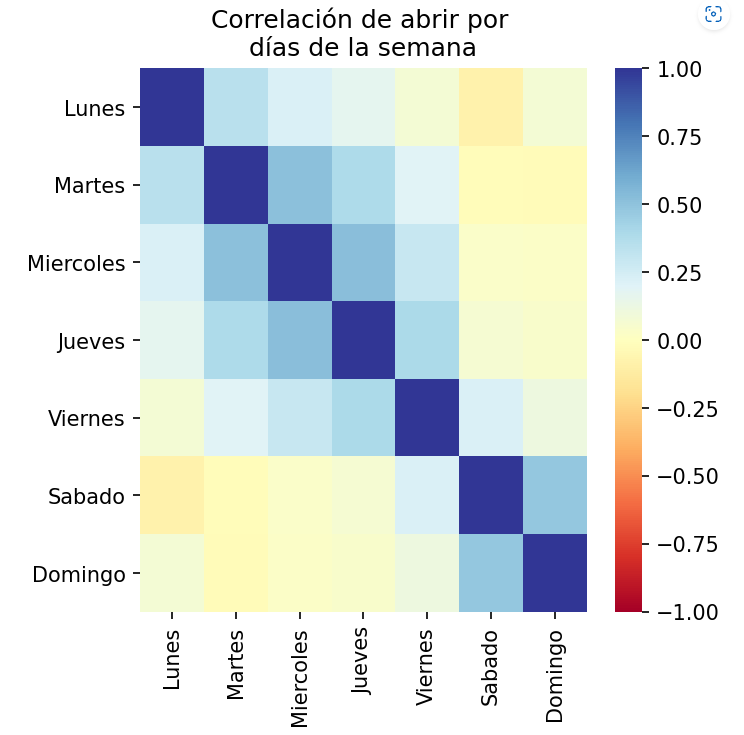

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       145219 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150273 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  float64
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 16.1+ MB


In [4]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,0.0,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,8.0,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,11.0,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,37.0,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13.0,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
# drop nans de la columna con la que vamos a trabajar ya que no hay forma de reemplazarlos
df = business_df.dropna(subset=['hours'])

In [13]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

C:\Users\Santiago\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
# para simplicidad
df = df[['business_id', 'name', 'hours']]
df

,business_id,name,hours
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
1,tUFrWirKiKi_TAnsVWINQQ,Target,"{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
3,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,"{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
4,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
...,...,...,...
127118,hn9Toz3s-Ei3uZPt7esExA,West Side Kebab House,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
127119,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,"{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
127120,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,"{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
127121,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,"{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [15]:
df.loc[0, 'hours']

"{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', 'Wednesday': '8:0-18:30', 'Thursday': '8:0-18:30', 'Friday': '8:0-18:30', 'Saturday': '8:0-14:0'}"

In [16]:
df.loc[0:, 'hours'] = [eval(hours) for hours in df.hours]

C:\Users\Santiago\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Santiago\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [18]:
df.loc[0:, 'days'] = [list(x.keys()) for x in df.hours]
# ok pandas no sé qué querés de mi '.loc[row_indexer,col_indexer] = value instead' es exactamente lo que estoy haciendo

C:\Users\Santiago\anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:516: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.array(val, copy=False)
C:\Users\Santiago\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Santiago\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with d

In [20]:
df.head()

,business_id,name,hours,days
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...","[Monday, Tuesday, Wednesday, Thursday, Friday,..."
1,tUFrWirKiKi_TAnsVWINQQ,Target,"{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...","[Monday, Tuesday, Wednesday, Thursday, Friday,..."
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...","[Monday, Tuesday, Wednesday, Thursday, Friday,..."
3,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,"{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...","[Wednesday, Thursday, Friday, Saturday, Sunday]"
4,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...","[Monday, Tuesday, Wednesday, Thursday, Friday,..."


In [35]:
df = df.join(df.days.str.join('|').str.get_dummies().add_prefix('dummy_'))

In [50]:
df.rename(mapper={'dummy_Friday':'Viernes', 'dummy_Monday': 'Lunes', 'dummy_Saturday': 'Sábado', 'dummy_Sunday': 'Domingo',
                 'dummy_Thursday': 'Jueves', 'dummy_Tuesday': 'Martes', 'dummy_Wednesday': 'Miércoles'}, axis=1, inplace=True)

In [55]:
df = df.reindex(columns=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

In [66]:
df.corr()

,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo
Lunes,1.000000,0.347871,0.225432,0.167519,0.070869,-0.082509,0.070935
Martes,0.347871,1.000000,0.508445,0.388791,0.193627,-0.021040,-0.023627
Miércoles,0.225432,0.508445,1.000000,0.523126,0.294930,0.038097,0.026810
Jueves,0.167519,0.388791,0.523126,1.000000,0.396430,0.069527,0.045878
Viernes,0.070869,0.193627,0.294930,0.396430,1.000000,0.226345,0.112702
Sábado,-0.082509,-0.021040,0.038097,0.069527,0.226345,1.000000,0.480009
Domingo,0.070935,-0.023627,0.026810,0.045878,0.112702,0.480009,1.000000


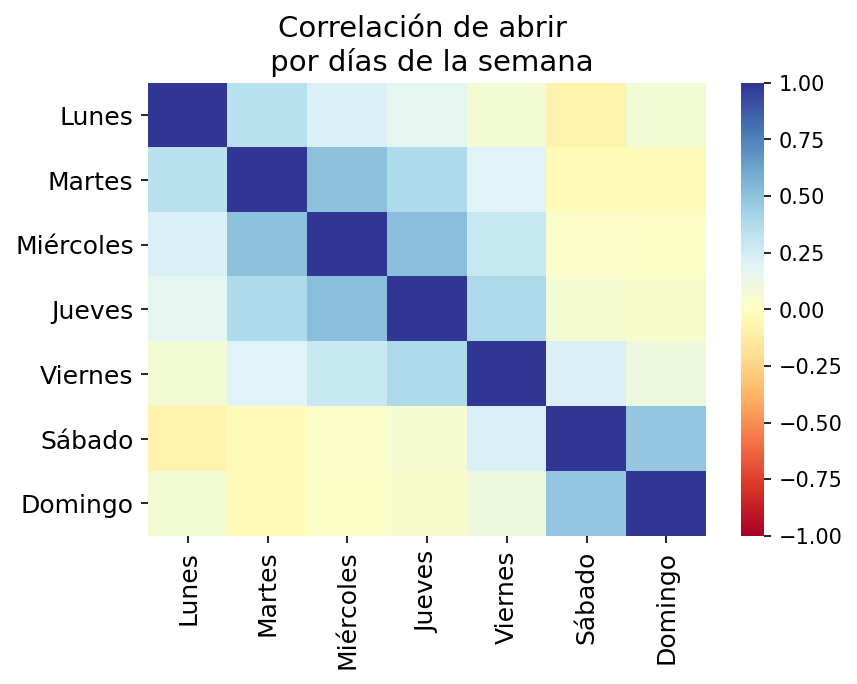

In [79]:
plt.figure(dpi=150)
sns.heatmap(df.corr(), cmap='RdYlBu', vmax=1, vmin=-1)


plt.title('Correlación de abrir \n por días de la semana', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('V4 (heatmap).png', bbox_inches='tight')
plt.show()

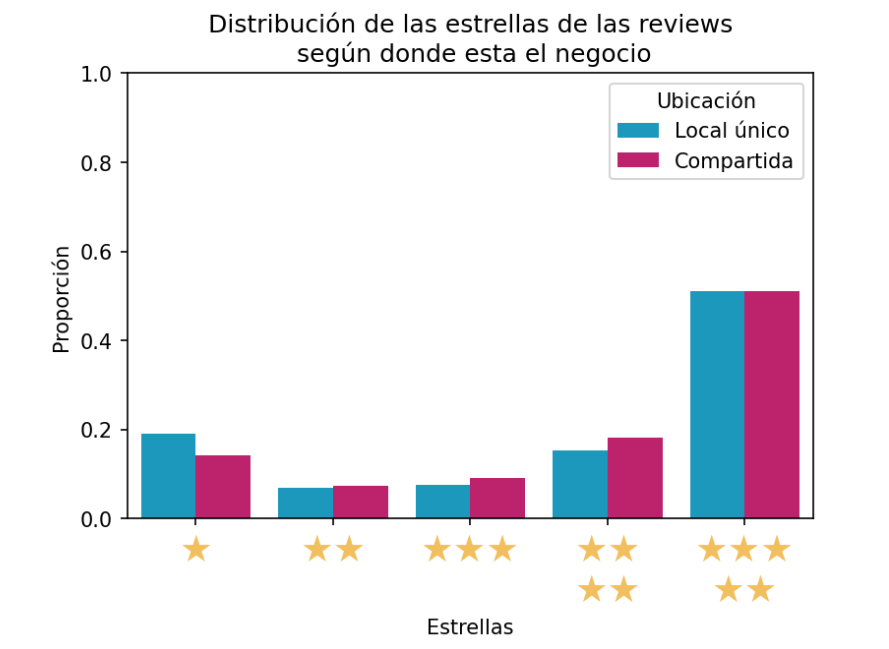

*  Poder diferenciar entre local único y compartido
*  Poder agrupar según estrellas
*  Redondear o eliminar puntajes intermedios (1.5, 2.5, etc)
*  ¿Por qué hay tanta diferencia entre 5 estrellas y 4 estrellas?. ¿De dónde salen esos valores? Quizás usar el df de reviews en vez del de businesses y matchear business id con address dentro de ese dataframe y hacer el flageo agrupamiento etc. 
*  En efecto es con reviews_df. Hay que matchear address con los business ids y después flagear compartido y único. Eso último ya lo tenemos hecho, entonces simplemente matcheando luego podemos asignar fácilmente.


* Todo resuelto, menos dos cosas: 
1. como plotear las proporciones de cada uno de los subgrupos
2. Por qué bosta mi displot se ve así 

In [256]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       145219 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150273 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  float64
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 16.1+ MB


In [16]:
business_df = business_df[['business_id', 'name', 'address', 'stars', 'review_count']]

In [17]:
b_df = business_df.dropna(subset=['address'])

In [99]:
b_df

,business_id,name,address,stars,review_count
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",5.0,0.0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,3.0,8.0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,3.5,11.0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,4.0,37.0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,4.5,13.0
...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,3.0,5.0
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,4.0,4.0
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",3.5,5.0
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,4.0,12.0


In [97]:
## Obtener locales que comparten dirección para poder flagearlos
grouped = b_df.groupby(['address']).agg({'address' : 'count'})

In [124]:
## Flageamos esos locales en el dataframe original
repetidos = list(grouped[grouped['address'] > 1].index)

b_df.loc[0:, 'ubicacion'] = b_df.address.map(lambda x: 'compartido' if x in repetidos else 'local unico')

C:\Users\Santiago\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Santiago\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [126]:
b_df[b_df['ubicacion'].str.contains('compartido')]

,business_id,name,address,stars,review_count,ubicacion
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,3.5,11.0,compartido
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,3.0,0.0,compartido
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,4.5,43.0,compartido
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,4.0,250.0,compartido
20,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,4.0,0.0,compartido
...,...,...,...,...,...,...
150326,JDM7kiCEmeBc_5W-z6eZZw,2601 Parkway Apartments,2601 Pennsylvania Ave,3.0,1.0,compartido
150328,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,4.5,28.0,compartido
150336,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,4.5,35.0,compartido
150339,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,4.5,12.0,compartido


In [129]:
b_df.groupby(['stars', 'ubicacion']).agg({'ubicacion': 'count'})

ubicacion
stars ubicacion             
1.0   compartido         334
      local unico       1488
1.5   compartido         857
      local unico       3911
2.0   compartido        1893
      local unico       7457
2.5   compartido        3218
      local unico      10883
3.0   compartido        4876
      local unico      13337
3.5   compartido        7388
      local unico      18726
4.0   compartido        8597
      local unico      21864
4.5   compartido        6811
      local unico      19279
5.0   compartido        2607
      local unico      11693

In [3]:
r_df = reviews_df[['business_id', 'stars']]

In [186]:
r_df.stars.value_counts()

5.0    1963891
1.0     671579
4.0     621158
3.0     309605
2.0     271872
Name: stars, dtype: int64

In [187]:
#b_df = b_df [['business_id', 'ubicacion']]
b_df

,business_id,ubicacion
0,Pns2l4eNsfO8kk83dixA6A,local unico
1,mpf3x-BjTdTEA3yCZrAYPw,local unico
2,tUFrWirKiKi_TAnsVWINQQ,compartido
3,MTSW4McQd7CbVtyjqoe9mw,local unico
4,mWMc6_wTdE0EUBKIGXDVfA,local unico
...,...,...
145214,IUQopTMmYQG-qRtBk-8QnA,local unico
145215,c8GjPIOTGVmIemT7j5_SyQ,local unico
145216,_QAMST-NrQobXduilWEqSw,local unico
145217,mtGm22y5c2UHNXDFAjaPNw,local unico


In [183]:
new_df = pd.merge(r_df, b_df, how='left')

In [2]:
#import pandas as pd
#new_df.to_csv('dataframe para visualización 2.csv')
new_df = pd.read_csv('dataframe para visualización 2.csv')

In [3]:
len(new_df[new_df.stars == 5].loc[new_df.ubicacion == 'local unico']) / len(new_df[new_df.ubicacion == 'local unico'])

0.5073614336207662

In [4]:
g2 = new_df.groupby(['stars', 'ubicacion']).agg({'stars': 'count'})

In [5]:
g2.rename({'stars': 'cantidad de reviews'}, axis=1, inplace=True)

In [6]:
g2

cantidad de reviews
stars ubicacion                       
1.0   compartido                174345
      local unico               486861
2.0   compartido                 91022
      local unico               179477
3.0   compartido                111422
      local unico               197074
4.0   compartido                222493
      local unico               396152
5.0   compartido                628772
      local unico              1297207

In [7]:
list(g2.index.get_level_values(1))

['compartido',
 'local unico',
 'compartido',
 'local unico',
 'compartido',
 'local unico',
 'compartido',
 'local unico',
 'compartido',
 'local unico']

In [95]:
g2['proporcion'] = 44

In [8]:
compartido = g2.xs('compartido', level=1)
l_unico  = g2.xs('local unico', level=1)

In [9]:
# por alguna razón los valores no se asignaban si intentaba asignarlos directamente a la posicion del dataframe
# con un .loc[] así que recurrí a la lista
total_unico = l_unico['cantidad de reviews'].sum() 
total_comp = compartido['cantidad de reviews'].sum()
lst = [ ]

for n in range(1, 6):
    for ubi in g2.index.get_level_values(1).unique():
        if ubi == 'compartido':
            lst.append(g2['cantidad de reviews'][n][ubi] / total_comp) 
        else:
            lst.append(g2['cantidad de reviews'][n][ubi] / total_unico) 


In [10]:
## asignamos la lista de proporciones al data frame
g2['proporcion'] = lst

In [11]:
g2

cantidad de reviews  proporcion
stars ubicacion                                   
1.0   compartido                174345    0.141969
      local unico               486861    0.190420
2.0   compartido                 91022    0.074119
      local unico               179477    0.070197
3.0   compartido                111422    0.090731
      local unico               197074    0.077079
4.0   compartido                222493    0.181175
      local unico               396152    0.154942
5.0   compartido                628772    0.512007
      local unico              1297207    0.507361

In [36]:
g2.loc[5, 'compartido']['cantidad de reviews']

628772

In [52]:
for ubicacion in g2.index.get_level_values(1).unique():
    print(type(ubicacion))

<class 'str'>
<class 'str'>


In [310]:
g2.index.get_level_values(1).unique()

Index(['compartido', 'local unico'], dtype='object', name='ubicacion')

In [12]:
g2

cantidad de reviews  proporcion
stars ubicacion                                   
1.0   compartido                174345    0.141969
      local unico               486861    0.190420
2.0   compartido                 91022    0.074119
      local unico               179477    0.070197
3.0   compartido                111422    0.090731
      local unico               197074    0.077079
4.0   compartido                222493    0.181175
      local unico               396152    0.154942
5.0   compartido                628772    0.512007
      local unico              1297207    0.507361

In [154]:
g2.loc[:]['proporcion']

stars  ubicacion  
1.0    compartido     0.141969
       local unico    0.190420
2.0    compartido     0.074119
       local unico    0.070197
3.0    compartido     0.090731
       local unico    0.077079
4.0    compartido     0.181175
       local unico    0.154942
5.0    compartido     0.512007
       local unico    0.507361
Name: proporcion, dtype: float64

In [157]:
g2.loc[:]['proporcion']

stars  ubicacion  
1.0    compartido     0.141969
       local unico    0.190420
2.0    compartido     0.074119
       local unico    0.070197
3.0    compartido     0.090731
       local unico    0.077079
4.0    compartido     0.181175
       local unico    0.154942
5.0    compartido     0.512007
       local unico    0.507361
Name: proporcion, dtype: float64

In [13]:
g2.reset_index(inplace=True)

In [215]:
g2.to_csv('dataframe para visualización V9.csv')

0.5073614336207662

In [3]:
#g2 = pd.read_csv('dataframe para visualización V9.csv')
g2.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
g2

,stars,ubicacion,cantidad de reviews,proporcion
0,1.0,compartido,174345,0.141969
1,1.0,local unico,486861,0.190420
2,2.0,compartido,91022,0.074119
3,2.0,local unico,179477,0.070197
4,3.0,compartido,111422,0.090731
5,3.0,local unico,197074,0.077079
6,4.0,compartido,222493,0.181175
7,4.0,local unico,396152,0.154942
8,5.0,compartido,628772,0.512007
9,5.0,local unico,1297207,0.507361


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

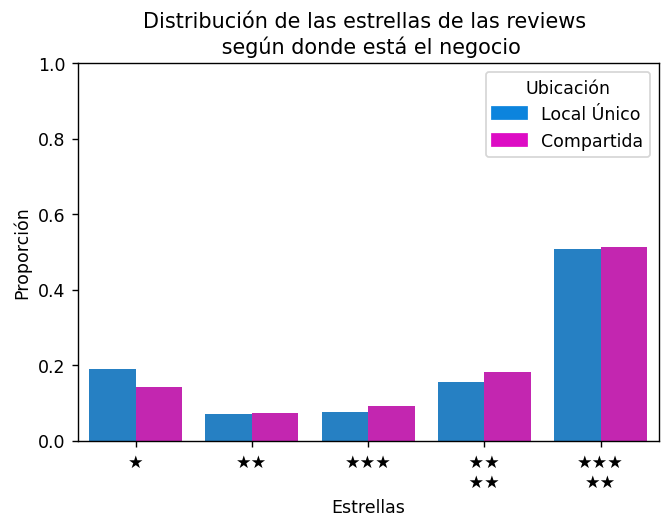

In [24]:
## leyenda
colors = {'Local Único':'#0C84DD'  , 'Compartida':'#DD0CC4'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

fig = plt.figure(dpi=125)
sns.barplot(data=g2, x='stars', y='proporcion', hue='ubicacion', hue_order=['local unico', 'compartido'],
            palette=['#0C84DD', '#DD0CC4'] )

plt.ylim(0.0, 1.0)
plt.ylabel('Proporción')
plt.xlabel('Estrellas')
# no me dejaba poner las estrellitas amarillas :(
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['★', '★★', '★★★',' ★★ \n ★★ ', '★★★\n★★'])
#ax.add_patch()
plt.title('Distribución de las estrellas de las reviews \n según donde está el negocio')
plt.legend(handles, labels, title='Ubicación')
plt.savefig('V9.png', bbox_inches='tight')
plt.show()

## C8 -  Yelp tiene la teoría de que mientras más variadas y “ricas” son las reviews de un usuario más popular es. Mientras más variadas son las reviews de un usuario, más difíciles son de comprimir. Por otro lado, mientras más textos se comprimen más fácil es lograr un buen ratio de compresión por lo que vamos a quedarnos con los usuarios que hicieran más de 200 reviews. ¿Cómo se correlaciona el ratio de compresión de todas las reviews de cada uno de esos usuarios con su cantidad de fans?

In [2]:
user_df = user_df[user_df['review_count'] >= 200]

In [3]:
user_df = user_df[['user_id', 'name', 'review_count', 'fans']]

In [103]:
user_df

,user_id,name,review_count,fans
630,FlXBpK_YZxLo27jcMdII1w,Mallory,296.0,102
927,_BcWyKQL16ndpBdggh2kNA,Karen,527.0,558
1206,Xw7ZjaGfr0WNVt6s_5KZfA,Marielle,468.0,379
1242,pou3BbKsIozfH50rxmnMew,Brett,515.0,914
1248,Er_1k4cl0VwKz9tfIn-FBw,Lynn,217.0,100
...,...,...,...,...
298393,_8_xgsROsH9h53_YErsZ3g,Jessica,216.0,5
303165,6EHUYIyEb-biAOAGRBqEpg,Andy,216.0,8
304643,EnFRwa9xPq9QaE4jBjFhlw,Larry,202.0,10
305087,qzquNJ5YJiidnry19rdN0w,M,321.0,5


In [104]:
df = pd.merge(user_df, reviews_df, how='left')

In [31]:
df.head()

,user_id,name,review_count,fans,review_id,business_id,stars,useful,funny,cool,text,date
0,FlXBpK_YZxLo27jcMdII1w,Mallory,296.0,102,rMlY_lj0mtOVTKaTN86hlw,kimOwpoIWzJJx7NHTAj74Q,2.0,1.0,0.0,0.0,I don't think I've ever had such bland Asian f...,2017-09-04 00:05:07
1,FlXBpK_YZxLo27jcMdII1w,Mallory,296.0,102,6uvB-j0NEoEXswrlQvK6mw,uY7um5bWKhiVwzL0wakJXA,3.0,3.0,2.0,1.0,The bagels here are good. They don't blow me a...,2017-05-30 17:56:54
2,FlXBpK_YZxLo27jcMdII1w,Mallory,296.0,102,sNlwtEyR0QTjfdc17sUeLg,ki1ji38VOBVhZJ__Awvf-Q,4.0,1.0,0.0,2.0,Boyfriend and I had a lovely date night at Par...,2017-08-13 03:08:10
3,FlXBpK_YZxLo27jcMdII1w,Mallory,296.0,102,kQO1meHKTHOTCn6DThg_jQ,x03j48hmv0R7NQcUjD0MQg,4.0,5.0,0.0,3.0,Naf Naf! Fun to say and fun to eat! I love ho...,2017-10-03 04:33:03
4,FlXBpK_YZxLo27jcMdII1w,Mallory,296.0,102,7brwW1mZz5Gqo26tkzl04A,pVHbXwsqLxNzAx9rdwy2EA,5.0,6.0,0.0,1.0,Boyfriend and I had a great meal here yesterda...,2018-05-06 19:29:43


In [6]:
import zstandard
import tqdm as tqdm

In [7]:
def compress_size(bytefile):
    return len(zstandard.compress(bytefile))

def ncd(obj1, obj2):
    len1 = compress_size(obj1)
    len2 = compress_size(obj2)
    concat_len = len(zstandard.compress(obj1+obj2))
    return (concat_len-min(len1, len2))/max(len1, len2)

In [ ]:
## por cada usuario tengo que comprimir cada review que hicieron y calcular el ratio. 

df.loc[df['user_id'] == df.user_id.unique()[0]]

In [142]:
len(df.loc[0, 'text'].encode('utf-16-le'))

1276

In [143]:
len(zstandard.compress(df.loc[0, 'text'].encode('utf-16-le')))

528

In [144]:
df['descomp'] = df.text.apply(lambda x: len(x.encode('utf-16-le')))

In [105]:
text_concats = []
for user in df.user_id.unique():
    concat = ''
    for t in df.loc[df['user_id'] == user]['text']:
        concat += t
    text_concats.append(concat)


In [106]:
len(text_concats[0])

266197

In [107]:
len(df.user_id.unique())

286

In [108]:
df1 = pd.DataFrame()
df1['user_id'] = df.user_id.unique()
df1['text'] = text_concats
len(df1['text'][0])

266197

In [109]:
df1['descomp'] = df1.text.apply(lambda x: len(x.encode('utf-16-le')))

In [110]:
df1['descomp'][0]

532394

In [111]:
df1['comprimidos'] = df1.text.apply(lambda x: compress_size(x.encode('utf-16-le')))

In [112]:
df1['ratio'] = df1['descomp'] / df1['comprimidos'] 

In [113]:
df1

,user_id,text,descomp,comprimidos,ratio
0,FlXBpK_YZxLo27jcMdII1w,I don't think I've ever had such bland Asian f...,532394,124783,4.266559
1,_BcWyKQL16ndpBdggh2kNA,We come to this Joann's when we can't get what...,456462,118312,3.858121
2,Xw7ZjaGfr0WNVt6s_5KZfA,My dad and I were here for lunch and after rea...,1078804,245201,4.399672
3,pou3BbKsIozfH50rxmnMew,Why 3 stars? Because I had high hopes but was ...,1746580,396085,4.409609
4,Er_1k4cl0VwKz9tfIn-FBw,My daughter loves coming here with her class. ...,200628,51126,3.924187
...,...,...,...,...,...
281,_8_xgsROsH9h53_YErsZ3g,Great place for good Mexican food. Highly reco...,268302,61656,4.351596
282,6EHUYIyEb-biAOAGRBqEpg,Good AYCE Japanese restaurant. It has a good a...,129598,28382,4.566204
283,EnFRwa9xPq9QaE4jBjFhlw,"You would think I would learn my lesson. But, ...",258846,56807,4.556586
284,qzquNJ5YJiidnry19rdN0w,"If you like sports, drink and decent food, thi...",183356,41964,4.369364


In [114]:
df = df[['user_id', 'fans']]

In [116]:
merged = pd.merge(df1, df, right_on='user_id', left_on='user_id', how='left')

In [121]:
m1 = merged.drop_duplicates('user_id').reset_index()

In [122]:
m1[['ratio', 'fans']].corr()

,ratio,fans
ratio,1.000000,-0.068314
fans,-0.068314,1.000000


## P23 - ¿Cúal es la correlación entre el score que dejaron los usuarios en cada review después de 2017, y el score promedio que dejaron en todas las reviews del 2017? Calcule sin usar samples

In [3]:
reviews_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
2,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4.0,1.0,0.0,1.0,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07
3,-P5E9BYUaK7s3PwBF5oAyg,Jha0USGDMefGFRLik_xFQg,bMratNjTG5ZFEA6hVyr-xQ,5.0,0.0,0.0,0.0,First time there and it was excellent!!! It fe...,2017-02-19 13:32:05
4,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0.0,0.0,0.0,"Great burgers,fries and salad! Burgers have a...",2017-01-02 03:17:34
...,...,...,...,...,...,...,...,...,...
3838100,zHZ-A1qyKDEgyZMDaD--wg,_XVdmFWSgTN6YlojUxixTA,6WaI-IN8ql0xpEKlb4q8tg,5.0,1.0,0.0,0.0,We redesigned my moms dress and mad it complet...,2022-01-17 20:59:01
3838101,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2.0,1.0,2.0,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
3838102,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1.0,0.0,0.0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
3838103,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1.0,0.0,0.0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


In [22]:
df = reviews_df[['user_id', 'stars', 'date']]
df

,user_id,stars,date
0,mh_-eMZ6K5RLWhZyISBhwA,3.0,2018-07-07 22:09:11
1,bcjbaE6dDog4jkNY91ncLQ,4.0,2017-01-14 20:54:15
2,RreNy--tOmXMl1en0wiBOg,4.0,2018-07-17 03:30:07
3,Jha0USGDMefGFRLik_xFQg,5.0,2017-02-19 13:32:05
4,4hBhtCSgoxkrFgHa4YAD-w,5.0,2017-01-02 03:17:34
...,...,...,...
3838100,_XVdmFWSgTN6YlojUxixTA,5.0,2022-01-17 20:59:01
3838101,Zo0th2m8Ez4gLSbHftiQvg,5.0,2021-03-31 16:55:10
3838102,mm6E4FbCMwJmb7kPDZ5v2Q,4.0,2019-12-30 03:56:30
3838103,YwAMC-jvZ1fvEUum6QkEkw,5.0,2022-01-19 18:59:27


In [33]:
## Todas las reviews son del 2017 en adelante
df.date.min()

'2017-01-01 00:00:35'

In [26]:
df2017 = df[df['date'].str.contains('2017')]

In [29]:
## promedios por usuario del año 2017
means2017 = df2017.groupby('user_id').agg({'stars': 'mean'})

In [ ]:
df.groupby('user_id').agg({})

In [41]:
means2017.reset_index(inplace=True)

In [47]:
means2017.rename({'stars': 'promedio 2017'}, axis=1, inplace=True)

In [48]:
new_df = pd.merge(df, means2017, how='left')

In [50]:
new_df.corr()

,stars,promedio 2017
stars,1.000000,0.525838
promedio 2017,0.525838,1.000000
